<a href="https://colab.research.google.com/github/SejalJadhav1/python_/blob/main/MachineLearningTechnique_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
def fit(x , y):
  n_samples , n_features = x.shape # no. of samples , no. of features
  class_count = np.unique(y)
  n_classes = len(class_count) # no. of classes

  w = np.zeros((n_classes , n_features) , dtype = np.float64)
  w_priors = np.zeros(n_classes , dtype = np.float64)

  for c in range(n_classes):
    #get examples with labels= c
    xc = x[y==c] 
    # here for y == 0 examples will be matrix => [0,1] i.e our xc
                                               # [0,1] 
    
    w[c , :] = np.sum(xc , axis = 0) / xc.shape[0]
    #  np.sum(xc , axis = 0)=> row wise sum of x1 and x2 for label y==0 i.e [0,2] from above
    # divide by total number of examples with y ==0
    #similarly, next for y==1

    w_priors[c] = xc.shape[0]/float(n_samples)
    #  P(y=0/1) is number of times y=0/1 divided by total no of examples (y)
    
  print("weight vector:" , w) 
  print("prior:" , w_priors)
  return w , w_priors







In [ ]:
n_samples , n_features = x.shape # no. of samples , no. of features
class_count = np.unique(y)
n_classes = len(class_count) # no. of classes

w = np.zeros((n_classes , n_features) , dtype = np.float64)
w_priors = np.zeros(n_classes , dtype = np.float64)

In [ ]:
w

array([[0., 0.],
       [0., 0.]])

In [ ]:
w_priors

array([0., 0.])

In [ ]:
for c in range(n_classes):
   xc = x[y==c] 
    


In [ ]:
w

array([[0., 0.],
       [1., 0.]])

In [ ]:
w[c , :] = np.sum(xc , axis = 0) / xc.shape[0]

In [ ]:
w[c , :]

array([1., 0.])

In [ ]:
xc

array([[1, 0],
       [1, 0]])

In [ ]:
np.sum(xc , axis = 0)

array([2, 0])

In [ ]:
x = np.array([[1,0] , [0,1] , [0,1] , [1,0]])
x

array([[1, 0],
       [0, 1],
       [0, 1],
       [1, 0]])

In [ ]:
y = np.array([1 ,0 ,0 ,1])
y

array([1, 0, 0, 1])

In [ ]:
fit(x,y)

weight vector: [[0. 1.]
 [1. 0.]]
prior: [0.5 0.5]


(array([[0., 1.],
        [1., 0.]]), array([0.5, 0.5]))

In [ ]:
n_samples , n_features = x.shape

In [ ]:
class_count = np.unique(y)
n_classes = len(class_count)

In [ ]:
class_count

array([0, 1])

In [ ]:
n_classes

2

In [ ]:
w = np.zeros((n_classes , n_features) , dtype = np.float64)

In [ ]:
w

array([[0., 0.],
       [0., 0.]])

In [ ]:
w_priors = np.zeros(n_classes , dtype = np.float64)


In [ ]:
w_priors

array([0., 0.])

In [ ]:
for c in range(n_classes):
  print(c)

0
1


In [ ]:
y

array([1, 0, 0, 1])

In [ ]:
for c in range(n_classes):
    #get egs with labels= c
    print(y==c)

[False  True  True False]
[ True False False  True]


In [ ]:
x

array([[1, 0],
       [0, 1],
       [0, 1],
       [1, 0]])

In [ ]:
for c in range(n_classes):
  #get egs with labels= c
  xc = x[y==c]

In [ ]:
xc

array([[1, 0],
       [1, 0]])

In [ ]:
xc.shape

(2, 2)

In [ ]:
fit(x,y)

weight vector: [[0. 1.]
 [1. 0.]]
prior: [0.5 0.5]


(array([[0., 1.],
        [1., 0.]]), array([0.5, 0.5]))

In [ ]:
w

array([[0., 0.],
       [0., 0.]])

In [ ]:
w[c , :] = np.sum(xc , axis = 0) / xc.shape[0]


In [ ]:
w

array([[0., 1.],
       [1., 0.]])

In [ ]:
w_priors[c] = xc.shape[0]/float(n_samples)


In [ ]:
w_priors[c]

0.5

In [ ]:
w_priors

array([0. , 0.5])

In [ ]:
xc.shape

(2, 2)

## IMPLEMENTATION 

In [ ]:
class BernoulliNB(object):
  def __init__(self , alpha =1.0):
    self.alpha= alpha
  
  def fit(self, x, y):
    n_samples , n_features = x.shape
    class_count = np.unique(y)
    n_classes = len(class_count)

    self.w = np.zeros((n_classes , n_features) , dtype = np.float64)
    self.w_priors = np.zeros(n_classes , dtype = np.float64)

    for c in range(n_classes):
      xc = x[y==c] 
      self.w[c , :] = (np.sum(xc , axis = 0) + self.alpha)/ (xc.shape[0] + 2 * self.alpha)
      self.w_priors[c] = (xc.shape[0] + self.alpha)/( float(n_samples)+ n_classes * self.alpha)
    print("class conditional density:" , self.w) 
    print("prior:" , self.w_priors)
 
  def log_likelihood_prior_product(self , x):
    return x@(np.log(self.w).T) + (1-x)@np.log((1-self.w).T) +np.log(self.w_priors)

  def predict_proba(self , x):
    q = self.log_likelihood_prior_product(x)
    return np.exp(q)/np.expand_dims(np.sum(np.exp(q) , axis = 1) , axis =1)
                        
  def predict(self, x):                                              
    return np.argmax(self.log_likelihood_prior_product(x) , axis = 1)





In [ ]:
bernoulli_nb = BernoulliNB()

In [ ]:
bernoulli_nb.fit(x,y)

class conditional density: [[0.5    0.5   ]
 [0.4325 1.82  ]]
prior: [0.16666667 0.5       ]


In [ ]:
bernoulli_nb.predict(x)

array([1, 0, 0, 1])

In [ ]:
bernoulli_nb.log_likelihood_prior_product(x)

array([[-3.4657359 , -1.26851133],
       [-1.26851133, -3.4657359 ],
       [-1.26851133, -3.4657359 ],
       [-3.4657359 , -1.26851133]])

In [ ]:
bernoulli_nb.predict_proba(x)

array([[0.1, 0.9],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.1, 0.9]])

## MULTICLASS CLASSIFICATION **SETUP**

In [ ]:
x =np.array([[1, 0 ] , [0 , 1 ], [0 , 1 ], [1, 0 ], [1, 1 ] , [1, 1]])
y = np.array([1 , 0 , 0 , 1 , 2 ,2])

In [ ]:
bernoulli_nb = BernoulliNB()

In [ ]:
bernoulli_nb.fit(x , y)

class conditional density: [[0.25 0.75]
 [0.75 0.25]
 [0.75 0.75]]
prior: [0.33333333 0.33333333 0.33333333]


In [ ]:
bernoulli_nb.predict(x)

array([1, 0, 0, 1, 2, 2])

In [ ]:
bernoulli_nb.log_likelihood_prior_product(x)

array([[-3.87120101, -1.67397643, -2.77258872],
       [-1.67397643, -3.87120101, -2.77258872],
       [-1.67397643, -3.87120101, -2.77258872],
       [-3.87120101, -1.67397643, -2.77258872],
       [-2.77258872, -2.77258872, -1.67397643],
       [-2.77258872, -2.77258872, -1.67397643]])

In [ ]:
bernoulli_nb.predict_proba(x)

array([[0.07692308, 0.69230769, 0.23076923],
       [0.69230769, 0.07692308, 0.23076923],
       [0.69230769, 0.07692308, 0.23076923],
       [0.07692308, 0.69230769, 0.23076923],
       [0.2       , 0.2       , 0.6       ],
       [0.2       , 0.2       , 0.6       ]])

In [ ]:
x = np.array([[0.25 , 3.14] , [0.48 , 8.96] , [0.75 , 9] , [0.55 , 6.50],
              [0 , 10] , [1 , 4.50]])
y= np.array([1,1,1,2,2,2])

In [ ]:
sum = GaussianNB()
sum.fit(x,y)

mean : [[0.49333333 7.03333333]
 [0.51666667 7.        ]]
var : [[0.04175556 7.57928889]
 [0.16722222 5.16666667]]
priors : [0.5 0.5]


In [ ]:
fit( x ,y)

In [ ]:
class GaussianNB(object):
  def fit(self , x ,y):
    n_samples , n_features = x.shape
    self.classes = np.unique(y)
    n_classes = len(self.classes)

    self.mean = np.zeros((n_classes , n_features) , dtype = np.float64)
    self.var = np.zeros((n_classes, n_features) , dtype = np.float64)
    self.priors = np.zeros(n_classes , dtype = np.float64)

    for idx , c in enumerate(self.classes):
      xc = x[y==c]
      self.mean[idx, :] = xc.mean(axis = 0)

      self.var[idx, :] = xc.var(axis=0)

      self.priors[idx] = xc.shape[0]/float(n_samples)

    print("mean :" , self.mean)
    print("var :" , self.var)
    print("priors :" , self.priors)

  def cal_pdf(self , class_idx , x):
    mean = self.mean[class_idx]
    var = np.diag(self.var[class_idx])
    z = np.power(2 * np.pi , x.shape[0]/2) * np.power(np.linalg.det(var) , 1/2)
    return (1/z) * np.exp(-(1/2)* (x-mean).T @ (np.linalg.inv(var)) @ (x - mean))
    
  def cal_likelihood_prior_product(self, x):
    self.likelihood_prior_product = np.zeros((x.shape[0] , len(self.classes)) , dtype = np.float64)

    for x_idx , x in enumerate(x):
      for idx , c in enumerate(self.classes):
        self.likelihood_prior_product[x_idx , c] = (
        np.log(self.cal_pdf(idx , x))+ np.log(self.priors[idx]))

  def predict(self , x):
    self.cal_likelihood_prior_product(x)
    return np.argmax(self.likelihood_prior_product , axis = 1)

  def predict_proba(self, x):
    self.cal_likelihood_prior_product(x)
    return np.exp(self.likelihood_prior_product)/np.expand_dims(
        np.sum(np.exp(self.likelihood_prior_product), axis = 1) , axis = 1)



In [ ]:
import numpy as np
x = np.array([[0.25 , 3.14] , [0.48 , 8.96] , [0.25 ,8.96] , [0.48 , 3.14]])
y = np.array([2,1,1,2])

In [ ]:
gaussian_nb = GaussianNB()
gaussian_nb.fit(x , y)
gaussian_nb.cal_pdf(2, x)

mean : [[0.365 8.96 ]
 [0.365 3.14 ]]
var : [[0.013225 0.      ]
 [0.013225 0.      ]]
priors : [0.5 0.5]


IndexError: ignored

In [ ]:
x , y = make_blobs(n_samples = 2000,
                   centers = 4,
                   n_features = 5,
                   random_state = 2
                   )

x_train, x_test, y_train , y_test = train_test_split(x,y,
                                                     test_size = 0.1 ) 
                                                  

In [ ]:
x_test.shape

(200, 5)

In [ ]:
np.unique(y_train)

array([0, 1, 2, 3])

In [ ]:

from sklearn.datasets import make_classification, make_blobs
from sklearn.model_selection import train_test_split

x , y = make_blobs(n_samples = 100,
                   n_features = 2,
                   centers = [[5,5] , [10 , 10]] ,
                   cluster_std= 1.5,
                   random_state = 2
                   )

x_train, x_test, y_train , y_test = train_test_split(x,y,
                                                     test_size = 0.2 , 
                                                     random_state =123)


In [ ]:
x , y = make_blobs(n_samples = 2000,
                   centers = 4,
                   n_features = 5,
                   random_state = 2
                   )

x_train, x_test, y_train , y_test = train_test_split(x,y,
                                                     test_size = 0.1 ) 

class GaussianNB(object):
  def fit(self , x ,y):
    n_samples , n_features = x.shape
    self.classes = np.unique(y)
    n_classes = len(self.classes)

    self.mean = np.zeros((n_classes , n_features) , dtype = np.float64)
    self.var = np.zeros((n_classes, n_features) , dtype = np.float64)
    self.priors = np.zeros(n_classes , dtype = np.float64)

    for idx , c in enumerate(self.classes):
      xc = x[y==c]
      self.mean[idx, :] = xc.mean(axis = 0)

      self.var[idx, :] = xc.var(axis=0)

      self.priors[idx] = xc.shape[0]/float(n_samples)

    print("mean :" , self.mean)
    print("var :" , self.var)
    print("priors :" , self.priors)

  def cal_pdf(self , class_idx , x):
    mean = self.mean[class_idx]
    var = np.diag(self.var[class_idx])
    z = np.power(2 * np.pi , x.shape[0]/2) * np.power(np.linalg.det(var) , 1/2)
    return (1/z) * np.exp(-(1/2)* (x-mean).T @ (np.linalg.inv(var)) @ (x - mean))
    
  def cal_likelihood_prior_product(self, x):
    self.likelihood_prior_product = np.zeros((x.shape[0] , len(self.classes)) , dtype = np.float64)

    for x_idx , x in enumerate(x):
      for idx , c in enumerate(self.classes):
        self.likelihood_prior_product[x_idx , c] = (
        np.log(self.cal_pdf(idx , x))+ np.log(self.priors[idx]))

  def predict(self , x):
    self.cal_likelihood_prior_product(x)
    return np.argmax(self.likelihood_prior_product , axis = 1)

gaussian_nb = GaussianNB()
gaussian_nb.fit(x_train , y_train)

print(classification_report(y_test , gaussian_nb.predict(x_test) ))

mean : [[-1.28789057 -9.50073452  0.97908265 -1.35641546 -1.61873511]
 [-3.3884782  -5.95610956  2.36473168 -4.0056801  -4.69136534]
 [ 2.33694437  0.65844129 -7.35064146  0.25888184 -6.4036952 ]
 [ 5.67465087  7.05985884 -0.12413109  6.9604079  -8.35390031]]
var : [[0.90584397 1.02118616 1.06062904 0.93064274 1.00292962]
 [1.13890106 0.99912372 0.98262213 1.04637794 1.06914736]
 [0.97592495 1.02660364 0.90805367 1.04137352 1.08962297]
 [1.00553435 0.9304437  0.95221422 0.90015997 0.97187193]]
priors : [0.25166667 0.25222222 0.24666667 0.24944444]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        47
           1       0.98      1.00      0.99        46
           2       1.00      1.00      1.00        56
           3       1.00      1.00      1.00        51

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200



In [ ]:
a = classification_report(y_test , gaussian_nb.predict(x_test) )
dict_1IDs = ['0','1','2' , '3']
dict2 = {}
dict_2IDs = ['precision','Recall','Accuracy' , 'F1 score']
dict1 = dict.fromkeys(dict_1IDs, dict2)
dict2 = dict.fromkeys(dict_2IDs, values)

for 


In [ ]:
dict1

{}

In [ ]:
gaussian_nb = GaussianNB()
gaussian_nb.fit(x_train , y_train)

mean : [[ 4.55853975  5.01739665]
 [10.30431548 10.08580617]]
var : [[2.13298417 2.30222002]
 [3.22242307 2.20662074]]
priors : [0.5125 0.4875]


In [ ]:
gaussian_nb.predict(x_test)


array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0])

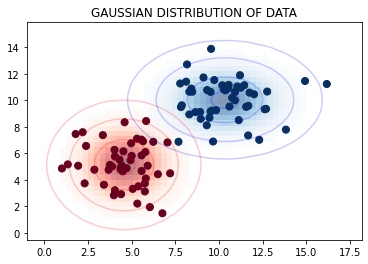

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()
ax.scatter(x[: , 0] , x[: , 1] , c =y , s =50 , cmap ="RdBu")

xlim = (min(x[:, 0])-2 , max(x[: , 0]) + 2)
ylim = (min(x[:, 1])-2 , max(x[: , 1]) + 2)

xg = np.linspace(xlim[0] , xlim[1], 60)
yg = np.linspace(ylim[0] , ylim[1], 40)
xx, yy = np.meshgrid(xg , yg)
xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

for label, color in enumerate(["red" , "blue"]):
  mask = (y==label)
  mu, std = x[mask].mean(0) , x[mask].std(0)
  P = np.exp(-0.5 * (xgrid-mu) **2/std**2).prod(1)
  Pm = np.ma.masked_array(P,P<0.03)
  ax.pcolorfast(xg , yg , Pm.reshape(xx.shape) , alpha =0.5 , 
                cmap = color.title() + "s")
  ax.contour(xx , yy, P.reshape(xx.shape),
             levels = [0.01 , 0.1 , 0.5 , 0.9],
             colors = color , alpha = 0.2)
ax.set(xlim = xlim, ylim = ylim)

plt.title("GAUSSIAN DISTRIBUTION OF DATA")
plt.show()


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test , gaussian_nb.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        11

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [ ]:
gaussian_nb.predict_proba(x_test)

array([[9.99999746e-01, 2.54140753e-07],
       [7.63749214e-14, 1.00000000e+00],
       [4.23038642e-03, 9.95769614e-01],
       [9.99986614e-01, 1.33855473e-05],
       [7.05769182e-06, 9.99992942e-01],
       [9.99820566e-01, 1.79433743e-04],
       [9.72541524e-01, 2.74584756e-02],
       [9.99982043e-01, 1.79572091e-05],
       [2.85910189e-05, 9.99971409e-01],
       [1.01888837e-07, 9.99999898e-01],
       [7.39129058e-01, 2.60870942e-01],
       [9.99793438e-01, 2.06561658e-04],
       [9.99999915e-01, 8.46737165e-08],
       [2.03213294e-05, 9.99979679e-01],
       [8.76198350e-09, 9.99999991e-01],
       [6.51163513e-05, 9.99934884e-01],
       [9.27638525e-05, 9.99907236e-01],
       [7.58034673e-09, 9.99999992e-01],
       [1.81773339e-03, 9.98182267e-01],
       [9.99985544e-01, 1.44557945e-05]])

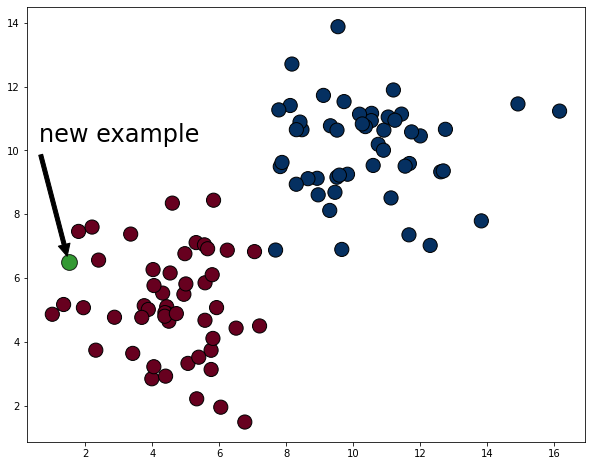

In [ ]:
x_new = np.array([1.5 , 6.5])

plt.figure(figsize = (10 , 8))
plt.scatter(x[: , 0] , x[: , 1] , marker = "o" , c=y, s =200 ,
            edgecolor = "k" , cmap ='RdBu')
plt.scatter(x_new[0] , x_new[1] , marker = "o" , c = "green" ,
            s = 250 , edgecolor = "k" , alpha = 0.8)
plt.annotate("new example" , xy = x_new, 
             xytext = (-30 , 120), textcoords = "offset points" ,
             arrowprops = dict(facecolor = "black" , shrink = 0.05 ) , fontsize = 24)
plt.show()

In [ ]:
 gaussian_nb.predict_proba(np.array([x_new]))

array([[9.99996296e-01, 3.70449944e-06]])

In [ ]:
x , y = make_blobs(n_samples = 100,
                   n_features = 2,
                   centers = [[5,5] , [10 , 10] , [20 , 20]] ,
                   cluster_std= 1.5,
                   random_state = 3
                   )

x_train, x_test, y_train , y_test = train_test_split(x,y,
                                                     test_size = 0.2 , 
                                                     random_state =123)


In [ ]:
gaussian_nb_multiclass = GaussianNB()

In [ ]:
gaussian_nb_multiclass.fit(x_train , y_train)

mean : [[ 4.94844927  4.67947138]
 [ 9.62097704 10.49990402]
 [19.63832097 19.94706375]]
var : [[1.99332345 2.36976247]
 [1.68415535 2.25596351]
 [1.79203315 1.24939267]]
priors : [0.3375 0.35   0.3125]


In [ ]:
print(classification_report(y_test , gaussian_nb_multiclass.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [ ]:
gaussian_nb_multiclass.predict_proba(x_test)

array([[1.02996770e-47, 2.67740135e-24, 1.00000000e+00],
       [5.00111567e-05, 9.99949989e-01, 6.51529293e-32],
       [9.99999999e-01, 9.45325297e-10, 1.33290144e-78],
       [1.00000000e+00, 6.49743430e-12, 7.70260328e-90],
       [1.50617094e-52, 5.94123831e-27, 1.00000000e+00],
       [3.77917160e-47, 9.99218112e-23, 1.00000000e+00],
       [5.30598294e-33, 9.05195020e-13, 1.00000000e+00],
       [6.63950534e-07, 9.99999336e-01, 1.42699786e-26],
       [3.57244754e-61, 3.86494439e-34, 1.00000000e+00],
       [9.70872284e-06, 9.99990291e-01, 5.02104511e-31],
       [9.99982252e-01, 1.77477098e-05, 2.51366893e-63],
       [3.93493321e-39, 5.51495730e-18, 1.00000000e+00],
       [1.00000000e+00, 4.72574372e-11, 1.19906531e-79],
       [1.19575291e-47, 3.45203067e-24, 1.00000000e+00],
       [9.09245241e-01, 9.07547595e-02, 1.30885257e-46],
       [9.99999997e-01, 2.64110663e-09, 3.37901343e-80],
       [9.97572472e-01, 2.42752753e-03, 1.17514148e-55],
       [1.12896485e-05, 9.99988

## **MULTINOMIAL_NB**

In [ ]:
class MultinomialNB():
    def __init__(self, alpha=1.0):
        self.alpha = alpha
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)
        self.w = np.zeros((n_classes, n_features), dtype=np.float64)
        self.w_priors = np.zeros(n_classes, dtype=np.float64)

        for idx, c in enumerate(self._classes):
            X_c = X[y == c]
            total_count = np.sum(np.sum(X_c, axis=1))
            self.w[idx, :] = (np.sum(X_c, axis=0) + self.alpha) / (total_count + n_classes * self.alpha)
            self.w_priors[idx] = (X_c.shape[0] + self.alpha) / (float(n_samples) + n_classes * self.alpha)

    def log_likelihood_prior_prod(self, X):
        return X @ (np.log(self.w).T) + np.log(self.w_priors)
    
    def predict_proba(self, X):
        q = self.log_likelihood_prior_prod(X)
        return np.exp(q) / np.expand_dims(np.sum(np.exp(q), axis=1), axis=1)
    
    def predict(self, X):
        q = self.log_likelihood_prior_prod(X)
        return np.argmax(q, axis=1)

In [ ]:
rng = np.random.RandomState(1)
x = rng.randint(5, size= (1000 , 5))
y = rng.randint(2 , size = (1000 ,))

x_train , x_test, y_train , y_test = train_test_split(x,y)

In [ ]:
x_train.shape

(750, 5)

In [ ]:
y_train.shape

(750,)

In [ ]:
multinomial_nb = MultinomialNB()

In [ ]:
multinomial_nb.fit(x_train, y_train)


In [ ]:
multinomial_nb.w_priors

array([0.48670213, 0.51329787])

In [ ]:
multinomial_nb.w

array([[0.21679688, 0.18136161, 0.19308036, 0.20089286, 0.20870536],
       [0.2097867 , 0.20250941, 0.19548306, 0.20401506, 0.18895859]])

In [ ]:
print(classification_report(y_test , multinomial_nb.predict(x_test)))

              precision    recall  f1-score   support

           0       0.44      0.39      0.41       120
           1       0.49      0.53      0.51       130

    accuracy                           0.46       250
   macro avg       0.46      0.46      0.46       250
weighted avg       0.46      0.46      0.46       250



In [ ]:
multinomial_nb.predict_proba(x_test[:10])

array([[0.49131766, 0.50868234],
       [0.43939076, 0.56060924],
       [0.48670071, 0.51329929],
       [0.57564091, 0.42435909],
       [0.5627501 , 0.4372499 ],
       [0.54362783, 0.45637217],
       [0.44944279, 0.55055721],
       [0.49199586, 0.50800414],
       [0.49124471, 0.50875529],
       [0.50383677, 0.49616323]])

In [ ]:
rng = np.random.RandomState(1)
x = rng.randint(5, size= (1000 , 5))
y = rng.randint(3, size = (1000 ,))

x_train , x_test, y_train , y_test = train_test_split(x,y)

In [ ]:
multinomial_nb = MultinomialNB()
multinomial_nb.fit(x_train, y_train)



In [ ]:
multinomial_nb.w_priors

array([0.34130146, 0.34262948, 0.31606906])

In [ ]:
multinomial_nb.w

array([[0.21167883, 0.19323857, 0.19746446, 0.1997695 , 0.19861698],
       [0.21353747, 0.1817083 , 0.20467365, 0.19701853, 0.20386785],
       [0.21149811, 0.20310533, 0.19009652, 0.19890894, 0.19723038]])

In [ ]:
print(classification_report(y_test , multinomial_nb.predict(x_test)))

              precision    recall  f1-score   support

           0       0.40      0.34      0.37        91
           1       0.36      0.49      0.42        85
           2       0.24      0.18      0.20        74

    accuracy                           0.34       250
   macro avg       0.33      0.34      0.33       250
weighted avg       0.34      0.34      0.33       250



In [ ]:
multinomial_nb.predict_proba(x_test[:10])

array([[0.33350246, 0.40511141, 0.26138612],
       [0.34082363, 0.28388815, 0.37528822],
       [0.34425448, 0.29193793, 0.36380759],
       [0.34079438, 0.33405731, 0.32514831],
       [0.34780925, 0.33614964, 0.31604111],
       [0.33408677, 0.37271502, 0.29319822],
       [0.33137949, 0.41757249, 0.25104802],
       [0.33790773, 0.33621469, 0.32587759],
       [0.33682521, 0.34756821, 0.31560659],
       [0.34256545, 0.30173493, 0.35569961]])